In [2]:
import pandas as pd
import sklearn
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import re

### Load the Data

In [2]:
tv=pd.read_csv('TV_Commercials_Combines.csv')

In [3]:
duplicate = tv.duplicated()
print(duplicate.sum())
tv[duplicate]

18063


,1,2,3,4,5,6,7,8,9,10,...,882,924,959,1002,1016,1048,1112,4124,4125,Label
111622,34,7.221330,3.191483,23.518745,11.492748,0.012884,0.010939,0.070129,0.042020,3479.684814,...,NaN,NaN,0.017241,NaN,NaN,NaN,NaN,0.340551,0.263356,1
111623,26,6.180094,3.015362,32.932747,18.120752,0.013149,0.010831,0.075000,0.050982,3362.287354,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.969324,0.623752,1
111624,25,2.462173,1.541003,20.039402,18.033579,0.015869,0.011657,0.062625,0.042195,3317.864746,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.148112,0.780920,1
111625,37,6.194136,2.658522,22.864201,13.588374,0.017141,0.012120,0.078041,0.072270,3491.640137,...,NaN,0.015625,0.023438,NaN,NaN,NaN,0.007812,0.746379,0.403130,1
111626,25,4.367200,2.063856,31.797680,14.305157,0.013647,0.013007,0.107625,0.080645,3327.662109,...,NaN,NaN,0.025000,NaN,NaN,NaN,0.087500,0.572578,0.588162,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129680,30,2.808389,1.475269,9.408182,3.851741,0.011282,0.010490,0.116250,0.075856,3421.109131,...,NaN,0.070000,0.040000,0.020000,0.030000,0.020000,NaN,0.840342,0.015348,1
129681,32,4.830225,1.974286,7.508844,3.180844,0.015507,0.014104,0.127734,0.071251,3479.608887,...,NaN,0.018519,0.009259,NaN,0.009259,0.027778,NaN,0.342186,0.555814,1
129682,32,5.308545,2.534434,10.520031,4.518093,0.017690,0.013312,0.104492,0.063117,3484.652588,...,NaN,0.009259,0.009259,NaN,NaN,0.009259,NaN,0.667208,0.821335,1
129683,42,0.426690,0.192054,2.405270,1.100260,0.013657,0.008062,0.106696,0.046419,3616.494629,...,NaN,NaN,NaN,0.013514,NaN,NaN,NaN,0.200665,0.354387,1


In [4]:
tv.drop_duplicates(keep=False,inplace=True) 

In [5]:
duplicate = tv.duplicated()
print(duplicate.sum())
tv[duplicate]

0


,1,2,3,4,5,6,7,8,9,10,...,882,924,959,1002,1016,1048,1112,4124,4125,Label


### Seleksi Features dengan menghapus feature yang memiliki  nilai null > 25%

In [6]:
print(tv.isnull().sum()/tv.shape[0])

1        0.000000
2        0.000000
3        0.000000
4        0.000000
5        0.000000
           ...   
1048     0.575519
1112     0.902799
4124     0.000000
4125     0.000000
Label    0.000000
Length: 205, dtype: float64


In [7]:
df_dataset=tv.loc[:,((tv.isnull().sum()/tv.shape[0])*100)<25]

Berdasarkan proses feature selection, dihasilkan 100 columns. Columns ini yang akan digunakan untuk membangun model klasifikasi

In [8]:
df_dataset.shape

(93559, 98)

### Memetakan nomor kolom menjadi nama kolom

In [9]:
MotionDist=[2,3]
FrameDiff=[4,5]
ShortTime=[6,7]
ZCR=[8,9]
SpectralCentroid=[10,11]
SpectralRoll=[12,13]
SpectralFlux=[14,15]
FundamentalFreq=[16,17]
EdgeChange=[4124,4125]
MotionDistbins=[*range(18, 59)]
FrameDiffbins=[*range(59, 92)]
TextAreaDistbins=[*range(92, 123)]
BagAudioWordsbins=[*range(123,4124)] 
l_MotionDist=list()

for m in range(0,len(MotionDistbins)):
    l_MotionDist.append("Motion Distribution bin_"+ str(MotionDistbins[m]))

l_FrameDiff=list()
for f in range(0,len(FrameDiffbins)):
    l_FrameDiff.append("Frame Difference bin_"+ str(FrameDiffbins[f]))
    

l_TextArea=list()
for t in range(0,len(TextAreaDistbins)):
    l_TextArea.append("Text Area Distribution bin_"+ str(TextAreaDistbins[t]))

l_BagAudioWords=list()
for b in range(0,len(BagAudioWordsbins)):
    l_BagAudioWords.append("Bag Audio Words bin_"+ str(BagAudioWordsbins[b]))
    
df_dict={ 1: "Shot Length" ,
        MotionDist[0] : "Motion Distribution Mean",
        MotionDist[1] : "Motion Distribution Variance",
        FrameDiff[0]: 'Frame Difference Distribution Mean',
        FrameDiff[1]: 'Frame Difference Distribution Variance',
        ShortTime[0] : 'Short time energy Mean',
        ShortTime[1] : 'Short time energy Variance',
        ZCR[0] : 'ZCR Mean',
        ZCR[1] : 'ZCR Variance',
        SpectralCentroid[0]:'SpectralCentroid Mean',
        SpectralCentroid[1]:'SpectralCentroid Variance',
        SpectralRoll[0]: 'Spectral Roll off Mean',
        SpectralRoll[1]: 'Spectral Roll off Variance',
        SpectralFlux[0]:'Spectral Flux Mean',
        SpectralFlux[1]:'Spectral Flux Variance',
        FundamentalFreq[0]: 'Fundamental Frequecy Mean',
        FundamentalFreq[1]:'Fundamental Frequecy Variance',
        EdgeChange[0]:'Edge Change Ratio Mean',
        EdgeChange[1]:'Edge Change Ratio Variance',       
}

for i in range(0,len(MotionDistbins)):
    df_dict[MotionDistbins[i]] = l_MotionDist[i]
    
for j in range(0,len(FrameDiffbins)):
    df_dict[FrameDiffbins[j]] = l_FrameDiff[j]
    
for k in range(0,len(TextAreaDistbins)):
    df_dict[TextAreaDistbins[k]] = l_TextArea[k]

for p in range(0,len(BagAudioWordsbins)):
    df_dict[BagAudioWordsbins[p]] = l_BagAudioWords[p]

In [10]:
namedict=df_dict
cols=df_dataset.columns
cols=[int(i) for i in cols[:-1]]
colnames=[namedict[i] for i in cols]
colnames.append('Label')

In [11]:
df_dataset.columns=colnames

In [12]:
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93559 entries, 0 to 111621
Data columns (total 98 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Shot Length                             93559 non-null  int64  
 1   Motion Distribution Mean                93559 non-null  float64
 2   Motion Distribution Variance            93559 non-null  float64
 3   Frame Difference Distribution Mean      93559 non-null  float64
 4   Frame Difference Distribution Variance  93559 non-null  float64
 5   Short time energy Mean                  93559 non-null  float64
 6   Short time energy Variance              93559 non-null  float64
 7   ZCR Mean                                93559 non-null  float64
 8   ZCR Variance                            93559 non-null  float64
 9   SpectralCentroid Mean                   93559 non-null  float64
 10  SpectralCentroid Variance               93559 non-null  f

### Dataset mengandung nilai null sehingga data perlu dibersihkan dengan mengisi nilai Mean masing-masing kolom pada data null

In [13]:
print(df_dataset.isnull().values.any())

True


In [14]:
# menghitung means dan kemudian mengisi nilai null
column_means = df_dataset.mean()
clean_dataset = df_dataset.fillna(column_means)

In [15]:
# periksa kembali apakah masih ada data yang missing
print(clean_dataset.isnull().values.any())

False


In [16]:
clean_dataset

,Shot Length,Motion Distribution Mean,Motion Distribution Variance,Frame Difference Distribution Mean,Frame Difference Distribution Variance,Short time energy Mean,Short time energy Variance,ZCR Mean,ZCR Variance,SpectralCentroid Mean,...,Text Area Distribution bin_118,Text Area Distribution bin_119,Bag Audio Words bin_491,Bag Audio Words bin_572,Bag Audio Words bin_573,Bag Audio Words bin_623,Bag Audio Words bin_816,Edge Change Ratio Mean,Edge Change Ratio Variance,Label
0,123,1.316440,1.516003,5.605905,5.346760,0.013233,0.010729,0.091743,0.050768,3808.067871,...,0.251688,0.176144,0.069915,0.141949,0.103814,0.050847,0.036017,0.422334,0.663918,1
1,124,0.966079,0.546420,4.046537,3.190973,0.008338,0.011490,0.075504,0.065841,3466.266113,...,0.206926,0.051774,0.075630,0.012605,0.037815,0.086134,0.023109,0.332664,0.766184,1
2,109,2.035407,0.571643,9.551406,5.803685,0.015189,0.014294,0.094209,0.044991,3798.196533,...,0.185767,0.038852,0.069712,0.038462,0.088942,0.139423,0.052885,0.346674,0.225022,1
3,86,3.206008,0.786326,10.092709,2.693058,0.013962,0.011039,0.092042,0.043756,3761.712402,...,0.165600,0.003983,0.135802,0.012346,0.086420,0.212963,0.077160,0.993323,0.840083,1
4,76,3.135861,0.896346,10.348035,2.651010,0.020914,0.012061,0.108018,0.052617,3784.488037,...,0.159495,0.000066,0.021127,0.007042,0.154930,0.151408,0.017606,0.341520,0.710470,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111617,84,0.571141,0.429302,5.601481,4.493654,0.016669,0.010648,0.113988,0.045117,3736.336670,...,0.066948,0.051338,0.041139,0.072785,0.303797,0.110759,0.069620,0.672047,0.647189,1
111618,25,1.242366,0.772255,19.877289,11.755177,0.016593,0.010652,0.097625,0.052185,3305.738037,...,0.101005,0.073604,0.050000,0.075000,0.537500,0.100000,0.012500,0.180709,0.103151,1
111619,64,0.566330,0.443887,5.739406,6.426752,0.015055,0.011919,0.098682,0.048214,3637.395508,...,0.085835,0.066839,0.076271,0.114407,0.161017,0.063559,0.008475,0.202583,0.046392,1
111620,71,0.815467,0.401193,3.989804,1.596751,0.019880,0.011590,0.109419,0.045566,3706.726074,...,0.064876,0.053495,0.037879,0.064394,0.352273,0.125000,0.045455,0.977861,0.410044,1


In [46]:
# clean_dataset.to_csv('data_cleaned.csv') 

In [15]:
# clean_dataset = pd.read_csv('./data_cleaned.csv')

# clean_dataset = clean_dataset.drop(['Unnamed: 0'], axis=1)

In [4]:
# Loading all the required python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import *

In [16]:
df = clean_dataset
X=df.drop('Label',axis=1) #Predictors
y=df['Label'] #Response
X.head()

,Shot Length,Motion Distribution Mean,Motion Distribution Variance,Frame Difference Distribution Mean,Frame Difference Distribution Variance,Short time energy Mean,Short time energy Variance,ZCR Mean,ZCR Variance,SpectralCentroid Mean,...,Text Area Distribution bin_117,Text Area Distribution bin_118,Text Area Distribution bin_119,Bag Audio Words bin_491,Bag Audio Words bin_572,Bag Audio Words bin_573,Bag Audio Words bin_623,Bag Audio Words bin_816,Edge Change Ratio Mean,Edge Change Ratio Variance
0,123,1.316440,1.516003,5.605905,5.346760,0.013233,0.010729,0.091743,0.050768,3808.067871,...,0.160327,0.251688,0.176144,0.069915,0.141949,0.103814,0.050847,0.036017,0.422334,0.663918
1,124,0.966079,0.546420,4.046537,3.190973,0.008338,0.011490,0.075504,0.065841,3466.266113,...,0.193530,0.206926,0.051774,0.075630,0.012605,0.037815,0.086134,0.023109,0.332664,0.766184
2,109,2.035407,0.571643,9.551406,5.803685,0.015189,0.014294,0.094209,0.044991,3798.196533,...,0.145836,0.185767,0.038852,0.069712,0.038462,0.088942,0.139423,0.052885,0.346674,0.225022
3,86,3.206008,0.786326,10.092709,2.693058,0.013962,0.011039,0.092042,0.043756,3761.712402,...,0.114123,0.165600,0.003983,0.135802,0.012346,0.086420,0.212963,0.077160,0.993323,0.840083
4,76,3.135861,0.896346,10.348035,2.651010,0.020914,0.012061,0.108018,0.052617,3784.488037,...,0.117717,0.159495,0.000066,0.021127,0.007042,0.154930,0.151408,0.017606,0.341520,0.710470


### Feature Scalling

In [151]:
# # Rescale the data
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler(feature_range=(0,1))
# rescaledX = scaler.fit_transform(X)

# # Convert X back to a Pandas DataFrame, for convenience
# X = pd.DataFrame(rescaledX, columns=X.columns)
# X.head()

### Split Data

In [17]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [18]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((65491, 97), (28068, 97))

In [19]:
# check data types in X_train

X_train.dtypes

Shot Length                                 int64
Motion Distribution Mean                  float64
Motion Distribution Variance              float64
Frame Difference Distribution Mean        float64
Frame Difference Distribution Variance    float64
                                           ...   
Bag Audio Words bin_573                   float64
Bag Audio Words bin_623                   float64
Bag Audio Words bin_816                   float64
Edge Change Ratio Mean                    float64
Edge Change Ratio Variance                float64
Length: 97, dtype: object

In [20]:
cols = X_train.columns

#### Feature Scaling

In [21]:
# from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [22]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [23]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [24]:
X_train.head()

,Shot Length,Motion Distribution Mean,Motion Distribution Variance,Frame Difference Distribution Mean,Frame Difference Distribution Variance,Short time energy Mean,Short time energy Variance,ZCR Mean,ZCR Variance,SpectralCentroid Mean,...,Text Area Distribution bin_117,Text Area Distribution bin_118,Text Area Distribution bin_119,Bag Audio Words bin_491,Bag Audio Words bin_572,Bag Audio Words bin_573,Bag Audio Words bin_623,Bag Audio Words bin_816,Edge Change Ratio Mean,Edge Change Ratio Variance
0,0.005230,0.071107,0.020965,0.141544,0.059095,0.551036,0.360105,0.163662,0.225366,0.959525,...,0.622872,0.596715,0.490019,0.014544,0.491583,0.219900,0.019664,0.002549,0.391682,0.283720
1,0.000355,0.097183,0.093139,0.234735,0.467113,0.235876,0.276289,0.248315,0.228290,0.882418,...,0.600854,0.530811,0.287224,0.008887,0.244905,0.203440,0.098523,0.025545,0.152515,0.967127
2,0.001595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.322339,0.359766,0.239838,0.112501,0.118083,0.203440,0.098523,0.071736,0.493257,0.196614
3,0.001566,0.022505,0.011289,0.038182,0.024869,0.380003,0.683368,0.304528,0.410572,0.907221,...,0.198891,0.233629,0.220116,0.114996,0.010304,0.101032,0.110281,0.105261,0.441817,0.617802
4,0.000000,0.068543,0.020722,0.154148,0.110021,0.321393,0.500981,0.275630,0.257534,0.837573,...,0.639490,0.690572,0.436983,0.260743,0.118083,0.190408,0.098523,0.068524,0.854968,0.343530


In [25]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(X_train, y_train)

GaussianNB()

In [28]:
y_pred = gnb.predict(X_test)

y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [29]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.7413


In [30]:
y_pred_train = gnb.predict(X_train)

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Model accuracy score: 0.7438


In [31]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set score: 0.7438
Test set score: 0.7413


In [32]:
new = pd.read_excel('./new_data.xlsx')

In [33]:
y_pred_train = gnb.predict(new)
y_pred_train

array([1, 1], dtype=int64)

In [34]:

y_test.value_counts()

 1    17698
-1    10370
Name: Label, dtype: int64

In [35]:
null_accuracy = (17698/(17698+10370))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.6305


In [36]:
import pickle
pickle.dump(gnb,open('gnb.pkl', 'wb'))

### Confussion Matrix

In [167]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[ 5759  4611]
 [ 2651 15047]]

True Positives(TP) =  5759

True Negatives(TN) =  15047

False Positives(FP) =  4611

False Negatives(FN) =  2651


<AxesSubplot:>

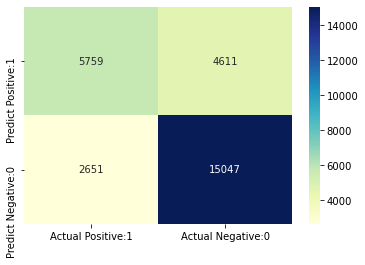

In [169]:
# visualize confusion matrix with seaborn heatmap
import seaborn as sns
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

### Classification metrices

In [170]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.68      0.56      0.61     10370
           1       0.77      0.85      0.81     17698

    accuracy                           0.74     28068
   macro avg       0.73      0.70      0.71     28068
weighted avg       0.74      0.74      0.73     28068



Classification accuracy

In [171]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [172]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.7413


classification error

In [174]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2587


In [175]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.5554


In [176]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.6848


In [177]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.6848


In [178]:
# print the first 10 predicted probabilities of two classes- 0 and 1

y_pred_prob = gnb.predict_proba(X_test)[0:10]

y_pred_prob

array([[7.45208159e-03, 9.92547918e-01],
       [9.83565332e-03, 9.90164347e-01],
       [2.93099196e-05, 9.99970690e-01],
       [2.35037038e-04, 9.99764963e-01],
       [1.32480102e-03, 9.98675199e-01],
       [9.99337299e-01, 6.62700823e-04],
       [4.72778334e-02, 9.52722167e-01],
       [2.13036796e-02, 9.78696320e-01],
       [1.00000000e+00, 1.79649154e-22],
       [4.69488468e-01, 5.30511532e-01]])

### K-Fold Cross Validation

In [181]:
# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(gnb, X_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.74778626 0.74866392 0.74667888 0.73858604 0.74408307 0.73660101
 0.74545732 0.74851122 0.73492136 0.74270881]


In [182]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.7434
